In [166]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler

mk_df = pd.read_csv('marketing_campaign.csv', delimiter = "\t")
pd.set_option('display.max_columns', None)
mk_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# Question 1

In [167]:
mk_df = marketing_df.dropna()

def sum_columns(row, *columns):
    return sum(row[col] for col in columns)

kids = ['Kidhome', 'Teenhome']
spent = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
mk_df['Toatl_kids'] = mk_df.apply(lambda row: sum_columns(row, *kids), axis=1)
mk_df['Total_spent'] = mk_df.apply(lambda row: sum_columns(row, *spent), axis=1)

mk_df.drop(["Kidhome", "Teenhome", "Z_CostContact", "Z_Revenue", 'Dt_Customer'], axis=1, inplace=True)

/var/folders/mg/lmrbfwqx6_zgt73dtvsgmyz00000gn/T/ipykernel_62354/604509450.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mk_df['Toatl_kids'] = mk_df.apply(lambda row: sum_columns(row, *kids), axis=1)
/var/folders/mg/lmrbfwqx6_zgt73dtvsgmyz00000gn/T/ipykernel_62354/604509450.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mk_df['Total_spent'] = mk_df.apply(lambda row: sum_columns(row, *spent), axis=1)
/var/folders/mg/lmrbfwqx6_zgt73dtvsgmyz00000gn/T/ipykernel_62354/604509450.py:11: SettingWithCopyW

In [168]:
def age(column):
    ages= []
    for i in mk_df[column]:
        ages.append(2023 - i)
    return ages

mk_df["Age"] = age('Year_Birth')
mk_df.drop(["Year_Birth", ], axis=1, inplace = True)

/var/folders/mg/lmrbfwqx6_zgt73dtvsgmyz00000gn/T/ipykernel_62354/2476137805.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mk_df["Age"] = age('Year_Birth')
/var/folders/mg/lmrbfwqx6_zgt73dtvsgmyz00000gn/T/ipykernel_62354/2476137805.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mk_df.drop(["Year_Birth", ], axis=1, inplace = True)


In [169]:
def one_hot_encoding(columns, dataframe):
    mk_df = pd.get_dummies(dataframe, columns =columns, dtype = int)
    return mk_df

columns = ['Education',	'Marital_Status']
mk_df = one_hot_encoding(columns, mk_df)
mk_df.head()

,ID,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Toatl_kids,Total_spent,Age,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,1617,66,0,0,1,0,0,0,0,0,0,1,0,0,0
1,2174,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2,27,69,0,0,1,0,0,0,0,0,0,1,0,0,0
2,4141,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,776,58,0,0,1,0,0,0,0,0,0,0,1,0,0
3,6182,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,1,53,39,0,0,1,0,0,0,0,0,0,0,1,0,0
4,5324,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,1,422,42,0,0,0,0,1,0,0,0,1,0,0,0,0


In [170]:
mk_df.describe()

,ID,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Toatl_kids,Total_spent,Age,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.00000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,52247.251354,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,0.947202,607.075361,54.179603,0.090253,0.024368,0.50361,0.164711,0.217058,0.000903,0.001354,0.104693,0.386733,0.212545,0.258574,0.034296,0.000903
std,3249.376275,25173.076661,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,0.749062,602.900476,11.985554,0.286608,0.154224,0.50010,0.371003,0.412335,0.030035,0.036777,0.306227,0.487112,0.409201,0.437950,0.182030,0.030035
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,27.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,35303.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,46.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,51381.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,396.500000,53.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8421.750000,68522.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1048.000000,64.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,11191.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2525.000000,130.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


I got rid of the null data. Created a total sum for the amount spent and kids.
changed the catagorical data into numerical

# Question 2

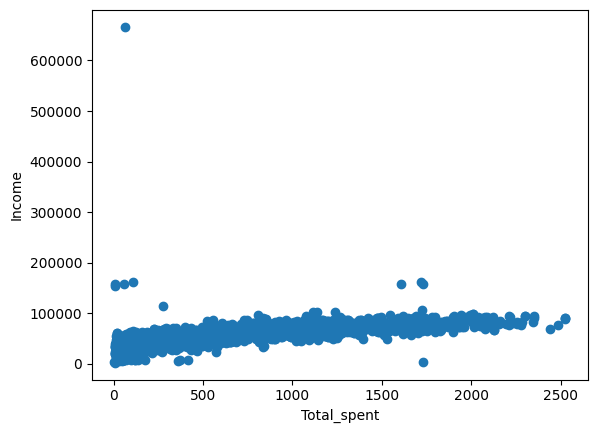

In [171]:
X = mk_df.drop('ID', axis = 1)

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

plt.scatter(X['Total_spent'],X['Income'])
plt.xlabel('Total_spent')
plt.ylabel('Income')

plt.show()

In [172]:
inertias = []
distortions = []

for k in range(1,10):
    k_model = KMeans(n_clusters=k).fit(X)
    distortion = sum(np.min(cdist(X, k_model.cluster_centers_,
                'euclidean'), axis =1))/X.shape[0]
    distortions.append(distortion)
    inertia = k_model.inertia_
    inertias.append(inertia)
    #kmeans_labels = KMeans.fit_predict(X, X_scaled)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

Text(0.5, 1.0, 'Elbow Method with Distortion')

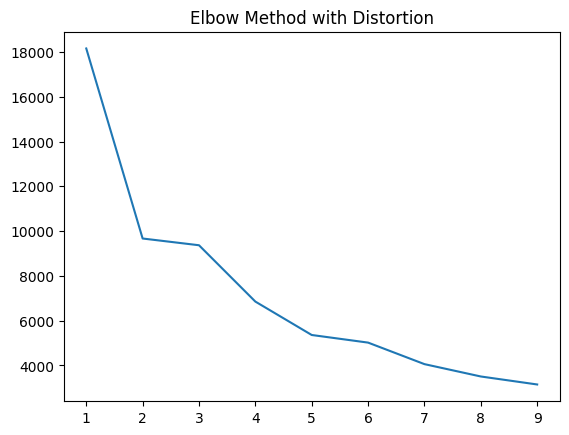

In [173]:
plt.plot(range(1,10), distortions)
plt.title('Elbow Method with Distortion')

Text(0.5, 1.0, 'Elbow Method with Inertia')

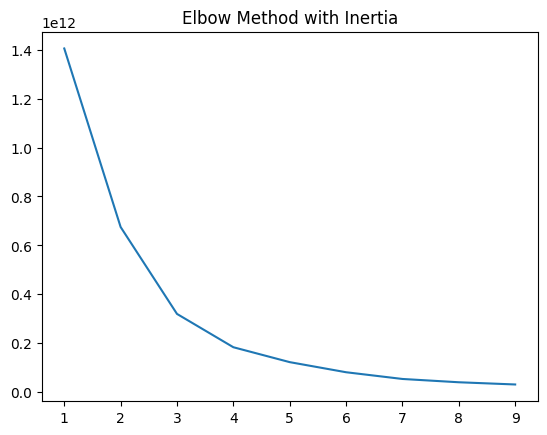

In [174]:
plt.plot(range(1,10),inertias)
plt.title('Elbow Method with Inertia')

i looked at the whole data becuase there is no target feature. the KMeans model suggests that the ideal number of clusters is 4. 
i used the elbow method with inertias and distrotions

# Question 3

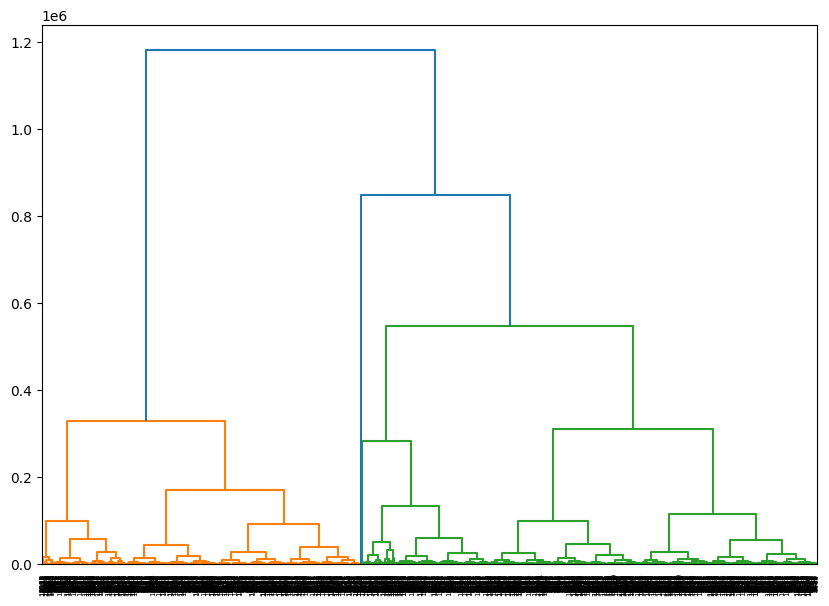

In [175]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(X, 'ward')
plt.figure(figsize=(10,7))
dendro = dendrogram(linked, labels=list(y))

In [176]:
hierarchical_labels = fcluster(linked, t=10, criterion='maxclust')

the heirarchal model suggest that the ideal numebr of clusters is 4. i used the dendogram approach

# Question 4

In [185]:
from sklearn import metrics

hierarchical_silhouette = metrics.silhouette_score(X_scaled, hierarchical_labels)
print(f"Silhouette Score for Hierarchical Clustering: {hierarchical_silhouette}")

Silhouette Score for Hierarchical Clustering: -0.028782943084502768


In [182]:
from sklearn.metrics import silhouette_score
def kmeans_sil(x, k):
    sil_score = []
    kms = KMeans(n_clusters = k, random_state = 0)
    kms.fit(x)
    sil_score.append(silhouette_score(X_scaled , kms.labels_))
    
    return sil_score

In [188]:
sil_score = kmeans_sil(X_scaled, 4)
sil_score

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0.12126387537617403]

from the silhoutte score the KMeans model is better than the hierarchical clustering model